<a href="https://colab.research.google.com/github/sbowma15/Machine_Learning_and_Data_Training/blob/main/Machine_Learning_and_Data_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 39AA - Traditional ML


Everything that we will look at in this course is a form of supervised learning (even though some of the NLP models we will look at it don't appear to be at first glance).

As we already discussed, supervised learning can roughly be split into two types of tasks, either regression or classification. We'll look at these each in turn now.

## I. Regression

Although the title may immediately evoke the thought of a conventional least squares regression model, the term regression here is a more general one that simply means to say that the target/outcome is lies on a continuum. That is, the targets we will try to predict or estimate are not binary nor discrete in nature.

### Step 1. Load and explore the data
As an example, let's look at the following data on housing prices. The target/outcome that we will want to later on predict is the house price itself. Let's load the data and start to explore.  

In [ ]:
#Importing proper packages as thier common nomenclatures
import pandas as pd
import numpy as np

#Takes in CSV file as "DATA_URL"
DATA_URL = "https://raw.githubusercontent.com/sgeinitz/cs39aa_data/main/houseprices.csv"

#pandas package reads CSV as "Train_df"
train_df = pd.read_csv(DATA_URL)

The pandas library has some useful functionality for managing datasets. The basic data type used is a pandas DataFrame, which we can confirm with the following.

In [ ]:
#if the next line is commented out, the output is "pandas.core.frame.Dataframe"
#Also, "type(train_df.dtypes)" ran alone; Output = "pandas.core.series.series"
#The output with "type(train_df.dtypes)" along with the below line uncommented -
#- still produces the same output as the two original, unaltered codes ran -
#- togeher, which is the same output as the second original line, -
#-"train_df.dtypes" ran by itself
type(train_df.dtypes)

#with the above line commented out, the output is the same as if neither were -
# - were commented out.
train_df.dtypes

#side note not sure if the output is this way because im using collab? I will be
#- looking into this. ive used pandas, numpy matplotlib etc in the past and ive-
#- noticed some of the imports can be slightly different to use on collab; -
#- for instance in CV with Dr. Fieng I found out the RGB is backwards and needs-
#- to be corrected.

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Recall that Python is very much follows an object-oriented programming paradigm, and pandas is no exception to that. A pandas DataFrame has both attributes/fields as well as methods that can be called. One attribute/field that is useful to look is `shape`, which tells us how many rows and columns a DataFrame has.

In [ ]:
# 'shape' of a DataFrame is it's number of rows and columns
#this pretty much does what we expect. This line prints the shape with a label
#that lets us know what is is
print("train_df.shape: ", train_df.shape)

# more specifically...
#concatonation using "print(f"...".."shape" of rows starting at 0, while-
#- the "shape" of the columns start at 1 give the count for both the rows and -
#- columns so the output is more user friendly. Excersize meant to demonstrate-
#- ability to begin navigating the data from the .csv
print(f"train_df has {train_df.shape[0]} rows and {train_df.shape[1]} columns")

train_df.shape:  (1460, 81)
train_df has 1460 rows and 81 columns


To see what all of the columns names are we can also print out the `columns` attribute/field of the DataFrame object.

In [ ]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Let's continue exploring the housing prices dataset using the pandas `describe()` function/method. This will summarize each column using common descriptive statistics (i.e. mean, stdev, etc.).

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Notice that with `describe()` it says there are only 38 columns even though train_df has 81 columns. That's because only the numeric columns had meaningful descriptive statistics. To see non-numeric columns as well we can simply print out the first few rows of a DataFrame using `head()`, although note that even though it now says there are 81 columns we only see the first 10 and last 10.

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can start to visually explore some of the individual columns/fields now, starting with the target variable, `SalePrice`.

We'll need `maplotlib` for this so we will import that first, and then plot.

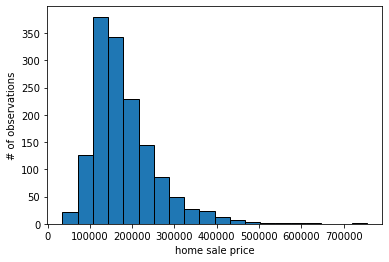

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_df['SalePrice'], bins=20, edgecolor='black')
plt.xlabel("home sale price")
plt.ylabel("# of observations")
plt.show()

We can also start to explore some of the relationships between the features (i.e. independent variables) and the target (i.e. dependent variable).

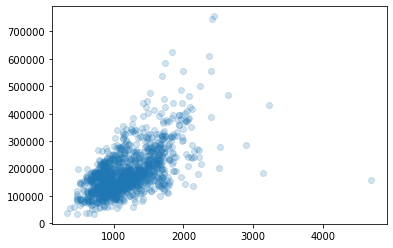

In [ ]:
plt.scatter(train_df['1stFlrSF'], train_df['SalePrice'], alpha=.2)
#plt.xlabel("first floor square footage")
#plt.ylabel("home sale price")
#plt.show()

Now let's look at some of the categorical/discrete features, such as `SaleCondition`.

In [ ]:
plt.hist(train_df['SaleCondition'])
plt.xlabel("condition at time of sale")
plt.ylabel("# of observations")
plt.show()

Before we can go much further we'll have to deal with some of the missing values in the data, so let's do that now with our DataFrame object's `isnull()` method, and then `sum()` method to add up the number of null entries in each column.

In [ ]:
null_entries = train_df.isnull().sum()
null_entries

It looks like most of the columns have 0 missing/na values, which is good. Let's try looking at just the ones with at least 1 missing/na value.

In [ ]:
null_entries[null_entries > 0]

There are some columns with many missing values, although most of them are only missing a few.

If we were working on a real project using this data then we would likely want to see whether those columns with just a few missing values are worth trying to salvage in some way (e.g. interpolation). For our purposes we will simply drop all of these columns from our dataset.

We'll then convert the categorial fields (that are strings) to a numerical format and double check the data type of all of the columns in `X`.

In [ ]:
# Create temporary y=target and X=features, excluding those cols with missing values from X
cols_w_nulls = null_entries[null_entries > 0].index
X = train_df.drop(columns=cols_w_nulls).copy()
y = X.pop("SalePrice")

# Label encoding for categoricals
for colname in X.select_dtypes('object').columns:
    X[colname], _ = X[colname].factorize()

# Check data type of each column in X
X.dtypes

### 2. Selecting features for a model

There are many ways to approach feature selection but we will quickly look at one using mutual information between each individual feature and the target (we won't dig into what mutual information is exactly is in this course, but you can think of it as a the difference between the probability distribution of a variable, X, versus the conditional probability distribution of X given Y - i.e. how much additional information does Y provide about X).

Let's create a simple wrapper around the scikit learn mutual information function to store and sort the results, which we can then plot.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    assert X.shape[0] == y.shape[0] and X.shape[1] > 1
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)#, discrete_features)

# Look at every fifth score to see the range of values
# Note: the range of possible values is positive reals, but in practice it rarely goes above 1.0 or 2.0
mi_scores[:11]

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# plot the top 20 scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores[:25])

### 3. Train a model

Let's start with a basic model, a linear regression model.

Also, let's assume that we want to use only the most simple, objective, and unambiguous features. For example, the most informative feature, `OverallQual`, is a feature that was derived in some way that required human input. If we want to take only the features that can be quickly and precisely used, then `OverallQual` would not be one of them. However, `GarageCars`, and `1stFlrSF` would be. Let's take a set of ~10 such features and use those in our model.

In [ ]:
from sklearn.linear_model import LinearRegression

# top informative features that are also easy/fast/precise to measure
selected_features = ['GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces']
X_linreg = X[selected_features].copy()

# declare and fit (i.e. train) a model
linreg_model = LinearRegression()
linreg_model.fit(X_linreg, y)

We need to have a way to assess the fit/performance of this model.

What is the standard way to assess a least squares linear regression model? _note the hint given there!_

In [ ]:
# Calculate predicted y's usign the linear regression model
y_pred = linreg_model.predict(X_linreg)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel('y actual')
plt.ylabel('y predicted')
plt.plot([0,5e5],[0,5e5], c='k', alpha=0.2)
plt.show()

# Calculate and show the mean squared error
mse_linreg = (((y - y_pred)**2).mean())
print("mse_linreg = ", mse_linreg)
print("rmse_linreg = ", np.sqrt(mse_linreg))


### 4. Feature Engineering

In the field of Data Science it is commonly said that 80-90% of the time is spent on cleaning and munging the data. Part of this process involves looking at the features and trying to derive new ones that can be used more readily by your model. In the case of linear regression we know that only linear relationships of the features are considered.

That's not to say that a more complex relationship cannot be modeled, but we must manipulate and transform the features to allow a linear regression model to take advantage of it.

For example, the true relationship between $y$ and $x$ may be quadratic in nature, i.e.:
  * $y = a * x^2 + b * x + ...$.

If, however, we only observe $x$, then we can simply create a new feature, $x^{'} = x * x$.

Often times new features are combinations of other features themselves, since most models cannot account for such interactions on their own.

In our case, suppose that we see the ratio of `GarageArea` to `1stFlrSF` helps our model perform better. Let's create this now and see how our model does.


In [ ]:
X_linreg['Garage1stFlrRatio'] = (X_linreg['GarageArea']/X_linreg['1stFlrSF'])
#plt.scatter(X_linreg['Garage1stFlrRatio'], y, alpha=0.2)
#plt.show()

linreg_model.fit(X_linreg, y)

# Calculate predicted y's usign the linear regression model
y_pred = linreg_model.predict(X_linreg)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel('y actual')
plt.ylabel('y predicted')
plt.plot([0,5e5],[0,5e5], c='k', alpha=0.2)
plt.show()

# Calculate and show the mean squared error
mse_linreg = (((y - y_pred)**2).mean())
print("mse_linreg = ", mse_linreg)
print("rmse_linreg = ", np.sqrt(mse_linreg))

Adding that feature is only a modest improvement in our case (~5% reduction in MSE), but interactions are often present in data yet difficult to incorporate for some types of models, particularly for linear regression.

### 5. Decision Tree Regressor
Now we will try another traditional ML model, namely a decision tree.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dectree_model = DecisionTreeRegressor(criterion='mse')
dectree_model.fit(X_linreg, y)
y_pred = dectree_model.predict(X_linreg)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel('y actual')
plt.ylabel('y predicted')
plt.plot([0,5e5],[0,5e5], c='k', alpha=0.2)
plt.show()

# Calculate and show the mean squared error
mse_linreg = (((y - y_pred)**2).mean())
print("mse_linreg = ", mse_linreg)
print("rmse_linreg = ", np.sqrt(mse_linreg))

Wait a second, what happened there? We have a nearly perfect model!

Is there anything we should be concerned about before we begin using this model for our new Zillow-type business endeavor?

### 6. Overfitting / Underfitting and the Train-Validate-Test Process

Yes, the issue with the decision tree we used above is that there was no maximum depth set for our tree, so it kept creating branches until it perfectly learned the dataset.

We can verify this by looking at the MSE for another dataset that was not used to train/fit the model. We'll have to separate this from the original dataset, and refit each model. Once we do though, we can compare the linear regression and decision tree model using this held-out test dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Create the train and test splits
X_train, X_test, y_train, y_test = train_test_split(X_linreg, y, test_size=0.20, random_state=1)

# Fit lin regression and calculate predicted test y's
linreg_model.fit(X_train, y_train)
y_linreg_pred = linreg_model.predict(X_test)

# Fit lin regression and calculate predicted test y's
dectree_model = DecisionTreeRegressor(criterion='mse')
dectree_model.fit(X_train, y_train)
y_dectree_pred = dectree_model.predict(X_test)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
plt.scatter(y_test, y_linreg_pred, alpha=0.2, c='b')
plt.scatter(y_test, y_dectree_pred, alpha=0.2, c='r')
plt.legend(['lin reg test predictions', 'dec tree test predictions'])
plt.xlabel('y test actual')
plt.ylabel('y test predicted')
plt.plot([0,5e5],[0,5e5], c='k', alpha=0.2)
plt.show()

# Calculate and show the mean squared errors
mse_linreg = (((y_test - y_linreg_pred)**2).mean())
print(f"linreg mse = {mse_linreg:.2f} (rmse = {np.sqrt(mse_linreg):.2f})")

mse_dectree = (((y_test - y_dectree_pred)**2).mean())
print(f"dectree mse = {mse_dectree:.2f} (rmse = {np.sqrt(mse_dectree):.2f})")


The resulting MSEs for the test datasets are much more comparable now, which restores some of our confidence in usefulness of basic linear regression.

It's likely that we can lower the MSE of the decision tree model though by preventing it from overfitting. One of the decision tree model parameters that can be used to prevent overfitting is the maximum depth of the tree (`max_depth` is the parameter we can pass to the function).

Try changing the `max_depth` and see what happens. Note that a higher maximum depth will cause the model to conform more to the training dataset, while a lower maximum depth will limit how much it conforms to the training data.

Often it is helpful to vary model parameters and calculate the loss (e.g. MSE) using the validation/test for each value of the model parameter. It's then possible to see how the test/validation loss changes with parameter value, and to find the optimal parameter value for your model.

## II. Classification

### 1. Titanic dataset

Let's now look at a classification problem using a dataset where each row represents a passenger on the Titanic. This target/outcome is whether the passenger survived the voyage or not, so it is binary in nature. The features/predictors include the following:

* survived: this is the target/outcome we are interested in predicting
* pclass: A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
* name
* sex
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - (some children travelled only with a nanny, therefore parch=0 for them)
* ticket: ticket number
* fare: ticket price
* cabin: cabin number
* embarked:
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton



Note that the use of this dataset as an example in Data Science/ML is common, but worth considering. As a prediction task, it doesn't make much sense for us to try to _predict_ survival for such a unique historical event. However, as a modeling task to better understand what features are most were most influential in predicting survival, it is an interesting and worthwhile dataset.


In [ ]:
DATA_URL = "https://raw.githubusercontent.com/sgeinitz/cs39aa_data/main/titanic.csv"

train_df = pd.read_csv(DATA_URL)
print("train_df.shape: ", train_df.shape)
train_df.head()

In [ ]:
train_df.describe()

As before, there are again some missing values to contend with.

In [ ]:
null_entries = train_df.isnull().sum()
null_entries

Cabin number is missing so many values (~80% of the observations), that it's probably best to drop the entire column.

Age seems like an important feature so that is something we would normally want to try to keep by using interpolation, or some other method. For our example though, we will simply drop all observations with a missing `Age` value, as well as the ones with missing `Embarked` values.

In [ ]:
# remove cabin columns
train_df.drop(columns=["Cabin"], inplace=True)

# remove rows with missing Age/Embarked values
train_df.dropna(axis=0, inplace=True)

train_df.reset_index(inplace=True)

# check shape of data after removing those rows/cols
train_df.shape

Similar to the home price data, let's see what the mutual information is for all of the predictors. We'll again have to convert categorial/string data to numerical values.

In [ ]:
# Copy features and targets over to X, y, respectively
X = train_df.copy()
y = X.pop("Survived")

# Encoding categoricals
for colname in X.select_dtypes('object').columns:
    X[colname], _ = X[colname].factorize()

# As before with the home prices, let's get mutual information plot results
mi_scores = make_mi_scores(X, y)#, discrete_features)
plt.figure(dpi=100, figsize=(5, 3))
plot_mi_scores(mi_scores)

It's important to be careful with the mutual information results. Sometimes features that appear to have a relationship are not as useful as they seem because they themselves may have a relationship with a different feature, or may present some form of data leakage.

For example, `index`, although neglible, appears to have a relationship with survival, which may indicate that the order of the observations in the dataset may be related to survival status in some way. It is not a feature that we would want to use for making predictions, however. `PassengerId` is similar. We can verify that there is no obvious relationship with a simple plot below.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.scatter(X.index, y, alpha=0.2)
ax1.set_title('Survival ~ index')
ax2.scatter(X.PassengerId, y, alpha=0.2)
ax2.set_title('Survival ~ PassengerId')

In addition to those two, we'll also drop `Ticket` and `Name` from our set of features.

In [ ]:
X.drop(columns=["index", "PassengerId", "Name", "Ticket"], inplace=True)

### 2. Modeling with RandomForest

To model this data we will use the most common _go-to_ ML model in Data Science/ML, which is the Random Forest model. The advantages of an RF model is that it is relatively quick and easy to fit/train (as opposed to some other ML models, particularly NNs), but that it is still flexible/sophisticated enough to be able to capture complex non-linear relationships (as opposed to linear models).

As you can imagine from the name, a RF is a collection of individual decision trees. We saw before that a decision tree model can easily overfit the data, whereas if we have a collection of independent decision trees, then we have another way to mitigate it (but overfitting is still possible!). RFs still often lead to high predictive power though, given that they are based on a collection of trees. In general, a collection of predictive models is known as an _ensemble_.

We won't go into too much more detail with the inner workings of RFs, but if  you are curious they are well worth looking at. Although not the first paper on RFs, the [foundational paper by Breiman, L.](https://link.springer.com/article/10.1023%2FA%3A1010933404324) discusses the boostrapping approach used, and it's publication coincides with the rise of Data Science in the early 2000's.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X, y)
y_pred = rf_model.predict_proba(X)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
plt.scatter(y, y_pred[:,1], alpha=0.3)
plt.xlabel('y actual')
plt.ylabel('y predicted (probability)')
plt.plot([0,1],[0.5,0.5], c='k', alpha=0.2)
plt.show()

As can be seen above, this model fits fairly well. The figure above shows the binary outcomes (survival = 1) on the x-axis, and the predicted probability of surival on the y-axis. Note that the latter of these is not binary but is instead a probability, so a continuous value in $[0, 1]$.

Note that for classification problems we ultimately want to have a binary prediction. However, as we can see in the plot above, our model outputs a predicted probability. It's up to us to determine what the threshold should be to make a positive or negative prediction. Oftentimes the default choice is to use a threshold of 0.5 (see the gray horizontal line above), but there may be cases when you'll want to choose another threshold.

### 3. Loss functions

Before we looked at the mean-squared error (MSE) as a loss function. The loss function, or sometimes more generally referred to as an objective function, is what is generally used to fit the model. That is, it is the function that we optimize to find the ideal values of the model's parameters or weights/biases. (Note that the terms _parameters_ and _weights_ can often have different meanings within the fields of Statistics vs Machine Learning.)

MSE makes sense for regression problems when we have a continuous outcome. It can still be used in classification problems as well, since our models will generally predict a continuous probability between $[0, 1]$. So it's useful to know how the MSE is defined, which is as follows.

__Mean-squared Error__

$MSE(y, \hat{y}) = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2$

When working with targets/outcomes that are categorical or discrete in nature there is another type of loss function that is commonly used, which is Cross-Entropy. Note that this can be used both for binary outcomes as well as multi-class outcomes.

__Cross Entropy__

$CE(y, \hat{y}) = - \sum_i y_i * \mathrm{log}(\hat{y}_i)$

Let's calculate each of these now for our trained RF model.

In [ ]:
# Calculate mean-squared error and binary cross entropy
rf_mse = (((y - y_pred[:,1])**2).mean())
print("mse: ", rf_mse)

yhat = y_pred[:,1]

# Calculate BCE manually
def bce(y_obs, y_prd):
    p0 = np.sum((1.00 - y_obs[y_obs == 0].to_numpy()) * np.log(1.00 - y_prd[y_obs == 0]))
    p1 = np.sum(y_obs[y_obs == 1].to_numpy() * np.log(y_prd[y_obs == 1]))
    return -1 * (p1 + p0)

print("bce: ", bce(y, yhat))

### 4. Tuning hyperparameters

As we now know, it's difficult to say whether this is a good value of the loss function. We have no other model to compare it to. Also, we have no validation/test set, so even if it the loss is low we don't know if there is overfitting going on.

Let's create a train and test set as we did before.

Furthermore, let's look at one of the hyperparameters for a RF model. As we said, RF models are often used because they generally don't require too much finetuning. But, there still are hyperparameters that can affect how well the model is able to generalize to new data.

To accomplish this let's also right a function that will a) create the RF model, b) fit the model, and c) calculate the loss.

In [ ]:
# Create train and test splits
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=1)

# A function to create and fit a RF with a specific number of trees
def fitRFModel(min_samples_split_hyper_param):
    rf_model = RandomForestClassifier(min_samples_split=min_samples_split_hyper_param, random_state=1)
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict_proba(X_train)[:,1]
    y_val_pred = rf_model.predict_proba(X_val)[:,1]
    train_loss = bce(y_train, y_train_pred) #F.binary_cross_entropy(torch.tensor(y_train_pred), torch.tensor(y_train.to_numpy().astype(float)), reduction="mean")
    val_loss = bce(y_val, y_val_pred) #F.binary_cross_entropy(torch.tensor(y_val_pred), torch.tensor(y_val.to_numpy().astype(float)), reduction="mean")
    return((train_loss.item(), val_loss.item()))

# Possible values of min_samples_split are 10 to 70 (by 5)
hyp_param_vals = list(range(10,71,5))
losses = []
for hp in hyp_param_vals:
    losses.append(fitRFModel(hp))

Let's now create a plot with the values of the min samples per leaf hyperparameter, `min_samples_leaf`, on the x-axis and the values of the loss function on the y-axis.

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1]) #.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(hyp_param_vals, [loss[1] for loss in losses], '--ro') # validattion loss
ax.plot(hyp_param_vals, [loss[0] for loss in losses], '--bo') # training loss
ax.legend(["Validation Loss", "Train Loss"])
ax.set_xticks(hyp_param_vals)
plt.show()

Starting on the left, at `min_samples_split=10`, we can conclude from the extremely low training loss and (relatively) high test/validation loss that  the model overfits there. Based on this plot it looks like the best value (that minimizes the validation loss) is around `min_samples_split=35`. You can verify this by commenting out the line above that plots the training loss so that only the test loss is shown.

Note, however, that the validation loss does not really vary all that much. This is precisely the reason why Random Forests are so often the first model that Data Scientists and engineers will look to - because they often don't require much finetuning! That is to say, changing the hyperparameter values often has little impact on how well the model generalizes beyond the training data. You can see this by playing with other hyperparameter values such as, `n_estimators`, which sets how many decision trees are in the RF. Try changing the code above to explore how the loss varies when `n_estimators` changes (the default value for `n_estimators` is 100, so that is a good place to start).

### 5. Training vs Validation vs Test

We have used the terms _test_ and _validation_ interchangeably up until now. In practice there is a difference between them. The training dataset is, of course, used to train or fit the model itself. The validation and test datasets, however, are distinct subsets of the data that we hold out from the training. The validation dataset is used to help tune the hyperparameters, similar to as we did above. The test dataset is held out until the very end; that is, it is never used to make any decisions about how the model is trained or tuned. We imagine that the test dataset represents real-world data that our model has never before seen.

A great example of a training, validation, and test dataset each being used is simply a Kaggle competition. Participants in a Kaggle competition have access to a single dataset, which they are individually responsible for splitting into a training and validation set in the way they deem best. Then, at the end of the competition, there is a test dataset that no participant had access to until that point. The test dataset is entirely new, and the participants models must make the best predictions possible using only the original training (and validation) dataset that they had access to earlier.

### 6. Other Performance Metrics/Measures

We have looked at loss functions as a way to measure the performance of our models, although their primary function is as the objective function in the optimization problem addressed when training/fitting a model. There are other performance metrics, particularly for classification, that are more intuitive for us to think about.

The first of these is _accuracy_, which is simply the proportion of time that the model predicts the correct class. As an example, consider the same train and validation split above, and a RF model (with `min_samples_split=35`). The predicted probabilities for the validation dataset are shown below. Points shown in blue are correctly classified, while points shown in red are incorrectly classified.


In [ ]:
rf_model = RandomForestClassifier(min_samples_split=35, random_state=1)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict_proba(X_train)[:,1]
y_val_pred = rf_model.predict_proba(X_val)[:,1]

y_color = ['b' if (y_val_pred[i] > 0.5 and y_val.to_numpy()[i] == 1) or (y_val_pred[i] < 0.5 and y_val.to_numpy()[i] == 0) else 'r' for i in list(range(len(y_val)))]

plt.scatter(y_val, y_val_pred, alpha=0.3, c=y_color, s=100)
plt.xlabel('y actual')
plt.ylabel('y predicted (probability)')
plt.plot([0,1],[0.5,0.5], c='k', alpha=0.2)
plt.show()


The same data depicted in the graph above is often communicated in a _confusion matrix_. For a binary classification problem the confusion matrix is simply a 2x2 matrix with the number of predicted vs actual outcomes. More generally, for a classification problem with $k$ classes, the confusion matrix will be $kxk$.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

__Accuracy__

Accuracy is straightforward to calculate from the confusion matrix - it is simply the ratio of correctly classified cases/observations to the total number of cases/observations.

From the confusion matrix above we see that $76$ negative cases were correctly predicted to be negative (i.e. "_true negatives_"), while $34$ positive cases were correctly predicted to be positive (i.e. "_true positives_"), for a total of $110$ correctly predicted cases. The total number of cases in the validation dataset was $76 + 9 + 24 + 34 = 143$, yielding:

* $\mathrm{Accuracy} = 110 / 143 = 0.7692$

__Precision and Recall__

Accuracy works well in scenarios when the number of negative and positive cases are roughly balanced. However, when the proportion of negative to postive cases is skewed one way or the other, then accuracy is not the ideal performance measure. As an example, consider a scenario in which the proportion of positive cases in the data is very small (e.g. example could be trying to predict a rare disease, or flagging malicious content on a website, etc.). In scenarios such as this, then if the true proportion of positive cases is 0.01, then even a model that predicts every case to be negative will still have accuracy of 0.99.

To overcome this deficiency of accuracy we can look to other performance metrics such as _precision_ and _recall_.

Precision is the number of correctly predicted positive cases among all of the cases that were predicted as being positive.

* $\mathrm{precision} = \frac{TP}{TP + FP}$

Recall, also known as sensitivity, is the proportion of all observed positive cases that were predicted to be positive by the model.

* $\mathrm{recall} = \frac{TP}{TP + FN}$

The _F1 score_ is the combination precision and recall and is often the preferred performance metric for data with a very low proportion of positive (or negative) cases.

* $\mathrm{F}_1 = 2 * \frac{precision * recall}{precision + recall}$


### 7. Model interpretability

We looked at the mutual information of each feature with the target variable earlier. However, the features that end up being most influential in a trained model can often vary from those results. This is because pre-modeling feature explorations, such as teh mutual information we looked at, are done pairwise and independent of the other features. It can sometimes be the case that a feature is more important when used immedi

In [ ]:
rf_model = RandomForestClassifier(min_samples_split=35, random_state=1)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots()
forest_importances.plot.barh(xerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Further Reading

If you are interested in learning more about any of the above material, the following short courses on Kaggle are another resource.  

* Pandas - [https://www.kaggle.com/learn/pandas]()
* Intro to ML - [https://www.kaggle.com/learn/intro-to-machine-learning]()
* Feature Engineering - [https://www.kaggle.com/learn/feature-engineering]()
* Intermediate ML - [https://www.kaggle.com/learn/intermediate-machine-learning]()
